## Problem Statement

Business Objective



An aviation company that provides domestic as well as international trips to the customers now
wants to apply a targeted approach instead of reaching out to each of the customers. This time
they want to do it digitally instead of tele calling. Hence they have collaborated with a social
networking platform, so they can learn the digital and social behaviour of the customers and
provide the digital advertisement on the user page of the targeted customers who have a high
propensity to take up the product.
Propensity of buying tickets is different for different login devices. Hence, you have to create 2
models separately for Laptop and Mobile. [Anything which is not a laptop can be considered as
mobile phone usage.]
The advertisements on the digital platform are a bit expensive; hence, you need to be very
accurate while creating the models.


```
# This is formatted as code
```



## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Social_Media_Data.csv')

## Data Overview

In [ ]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [ ]:
df.tail()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1,23
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1,11
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1,12
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0,20
11759,1011760,No,270.0,Tab,22025.0,8,3,Historical site,104.0,4470,2,No,29,No,1,0,14


In [ ]:
print(df.shape)

print(df.duplicated().sum())

print(df.size)

(11760, 17)
0
199920


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
df.isnull().sum()

,0
UserID,0
Taken_product,0
Yearly_avg_view_on_travel_page,581
preferred_device,53
total_likes_on_outstation_checkin_given,381
yearly_avg_Outstation_checkins,75
member_in_family,0
preferred_location_type,31
Yearly_avg_comment_on_travel_page,206
total_likes_on_outofstation_checkin_received,0


In [ ]:
df.isnull().sum().sum()

1430

In [ ]:
df.nunique()

,0
UserID,11760
Taken_product,2
Yearly_avg_view_on_travel_page,331
preferred_device,10
total_likes_on_outstation_checkin_given,7888
yearly_avg_Outstation_checkins,30
member_in_family,7
preferred_location_type,15
Yearly_avg_comment_on_travel_page,100
total_likes_on_outofstation_checkin_received,6288


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,11760.0,1.005880e+06,3394.963917,1000001.0,1002940.75,1005880.5,1008820.25,1011760.0
Yearly_avg_view_on_travel_page,11179.0,2.808308e+02,68.182958,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,2.817048e+04,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,7.479003e+01,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6.531699e+03,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571e+00,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,2.866156e+01,48.660504,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712245e+00,1.080887,1.0,2.00,3.0,4.00,4.0
Adult_flag,11760.0,7.938776e-01,0.851823,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,1.381743e+01,9.070657,0.0,8.00,12.0,18.00,270.0


In [ ]:
df.drop(['UserID'], axis=1, inplace=True)

In [ ]:
df['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'ANDROID', nan, 'Android', 'Android OS',
       'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object)

In [ ]:
df['preferred_device'].value_counts()

,count
preferred_device,
Tab,4172
iOS and Android,4134
Laptop,1108
iOS,1095
Mobile,600
Android,315
Android OS,145
ANDROID,134
Other,2


In [ ]:
df['preferred_location_type'].unique()

array(['Financial', 'Other', 'Medical', nan, 'Game', 'Social media',
       'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Tour  Travel',
       'Beach', 'Historical site', 'Big Cities', 'Trekking',
       'Hill Stations'], dtype=object)

In [ ]:
df['yearly_avg_Outstation_checkins'].unique()

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', nan, '22', '14', '20', '28', '17', '13',
       '*', '5', '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [ ]:
df['preferred_location_type'].value_counts()

,count
preferred_location_type,
Beach,2424
Financial,2409
Historical site,1856
Medical,1845
Other,643
Big Cities,636
Social media,633
Trekking,528
Entertainment,516


In [ ]:
df['yearly_avg_Outstation_checkins'].unique()

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', nan, '22', '14', '20', '28', '17', '13',
       '*', '5', '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [ ]:
df['member_in_family'].unique()

array(['2', '1', '4', 'Three', '3', '5', '10'], dtype=object)

In [ ]:
df['following_company_page'].unique()

array(['Yes', 'No', nan, '1', '0'], dtype=object)

In [ ]:
df['Adult_flag'].unique()

array([0, 1, 3, 2])

In [ ]:
new_df =df.copy()
new_df['preferred_device'] = np.where(new_df['preferred_device'] =='Laptop' , 'Laptop','Mobile')

new_df['following_company_page'].replace(to_replace='1' ,value='Yes',inplace=True)
new_df['following_company_page'].replace(to_replace='0' ,value='No',inplace=True)

new_df['member_in_family'].replace(to_replace='Three',value=3,inplace=True)
new_df['member_in_family']= new_df['member_in_family'].astype(int)


new_df['yearly_avg_Outstation_checkins'].replace(to_replace='*',value=np.nan,inplace=True)
new_df['yearly_avg_Outstation_checkins']= new_df['yearly_avg_Outstation_checkins'].astype(float)


new_df['Adult_flag'] = np.where(new_df['Adult_flag']>=1, 'Yes', 'No')

In [ ]:
new_df['Adult_flag'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
new_df['yearly_avg_Outstation_checkins'].unique()

array([ 1., 24., 23., 27., 16., 15., 26., 19., 21., 11., 10., 25., 12.,
       18., 29., nan, 22., 14., 20., 28., 17., 13.,  5.,  8.,  2.,  3.,
        9.,  7.,  6.,  4.])

In [ ]:
new_df['preferred_device'].value_counts()

,count
preferred_device,
Mobile,10652
Laptop,1108


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64
 2   preferred_device                              11760 non-null  object 
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64
 4   yearly_avg_Outstation_checkins                11684 non-null  float64
 5   member_in_family                              11760 non-null  int64  
 6   preferred_location_type                       11729 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

In [ ]:
new_df.isnull().sum().sort_values(ascending=False)

,0
Yearly_avg_view_on_travel_page,581
total_likes_on_outstation_checkin_given,381
Yearly_avg_comment_on_travel_page,206
following_company_page,103
yearly_avg_Outstation_checkins,76
preferred_location_type,31
Taken_product,0
preferred_device,0
member_in_family,0
total_likes_on_outofstation_checkin_received,0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64
 2   preferred_device                              11760 non-null  object 
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64
 4   yearly_avg_Outstation_checkins                11684 non-null  float64
 5   member_in_family                              11760 non-null  int64  
 6   preferred_location_type                       11729 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

In [ ]:
continues_variable = ['Yearly_avg_view_on_travel_page','total_likes_on_outstation_checkin_given','yearly_avg_Outstation_checkins','Yearly_avg_comment_on_travel_page']

categorical_variable = ['preferred_location_type','following_company_page']

In [ ]:
from sklearn.impute import SimpleImputer
con_missing_values = SimpleImputer(missing_values=np.nan, strategy='mean')
new_df[continues_variable] = con_missing_values.fit_transform(new_df[continues_variable])

In [ ]:
cat_missing_values = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
new_df[categorical_variable] = cat_missing_values.fit_transform(new_df[categorical_variable])

In [ ]:
new_df.isnull().sum()

,0
Taken_product,0
Yearly_avg_view_on_travel_page,0
preferred_device,0
total_likes_on_outstation_checkin_given,0
yearly_avg_Outstation_checkins,0
member_in_family,0
preferred_location_type,0
Yearly_avg_comment_on_travel_page,0
total_likes_on_outofstation_checkin_received,0
week_since_last_outstation_checkin,0


In [ ]:
outliers_count = {}

for column in new_df.select_dtypes(include=np.number).columns:
    Q1 = new_df[column].quantile(0.25)
    Q3 = new_df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = new_df[(new_df[column] < lower_bound) | (new_df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print("Number of outliers in each column:")
pd.DataFrame([{'Column': column, 'No. of outliers': outliers} for column, outliers in outliers_count.items()])

Number of outliers in each column:


,Column,No. of outliers
0,Yearly_avg_view_on_travel_page,29
1,total_likes_on_outstation_checkin_given,4
2,yearly_avg_Outstation_checkins,0
3,member_in_family,11
4,Yearly_avg_comment_on_travel_page,40
5,total_likes_on_outofstation_checkin_received,916
6,week_since_last_outstation_checkin,0
7,montly_avg_comment_on_company_page,242
8,travelling_network_rating,0
9,Daily_Avg_mins_spend_on_traveling_page,350


# Exploratry Data Analysis

## Univarite Analysis

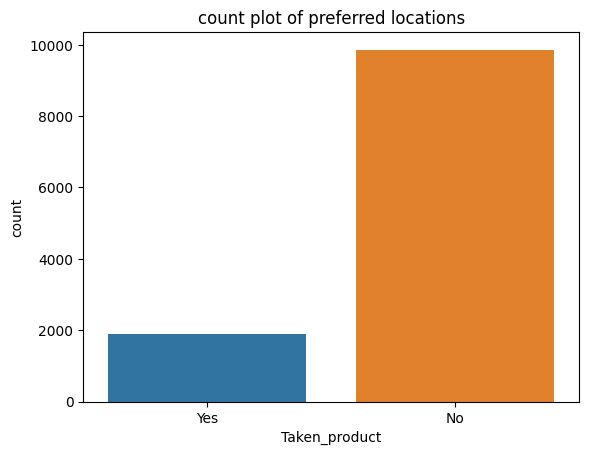

In [ ]:
sns.countplot(new_df,x='Taken_product',hue='Taken_product')

plt.title('count plot of preferred locations')
plt.show()

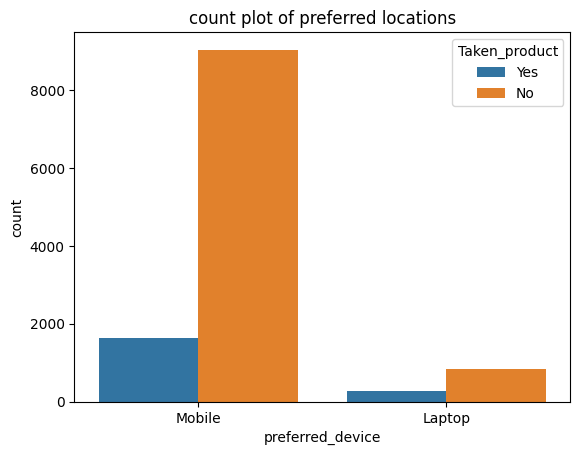

In [ ]:
sns.countplot(new_df,x='preferred_device',hue='Taken_product')
plt.title('count plot of preferred locations')
plt.show()

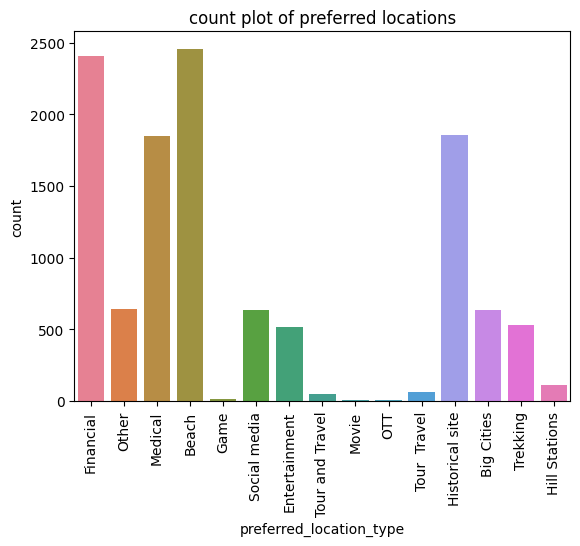

In [ ]:
sns.countplot(new_df,x='preferred_location_type',hue='preferred_location_type')
plt.xticks(rotation=90)
plt.title('count plot of preferred locations')
plt.show()

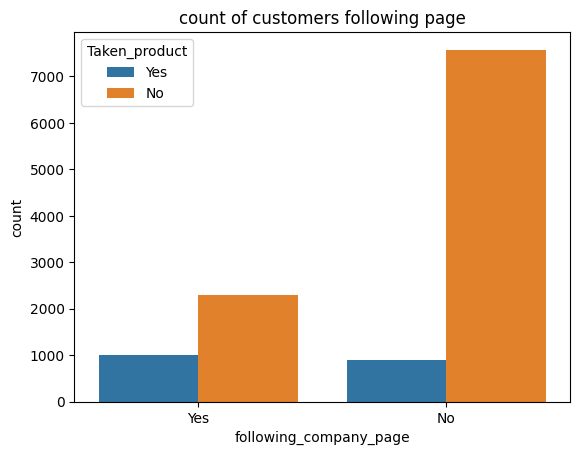

In [ ]:
sns.countplot(data=new_df,x='following_company_page',hue='Taken_product')
plt.title('count of customers following page')
plt.show()

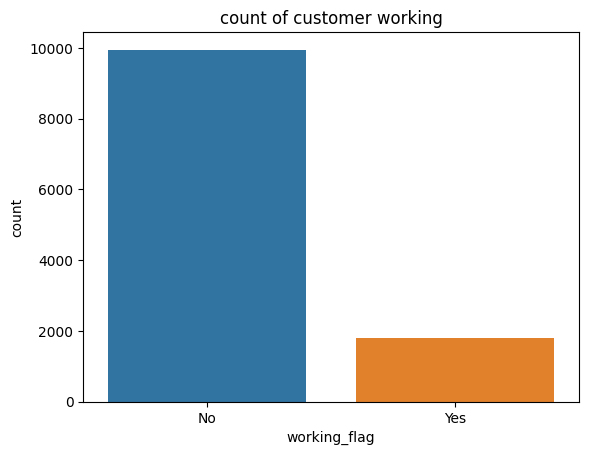

In [ ]:
sns.countplot(new_df,x='working_flag',hue='working_flag')
plt.title('count of customer working')
plt.show()

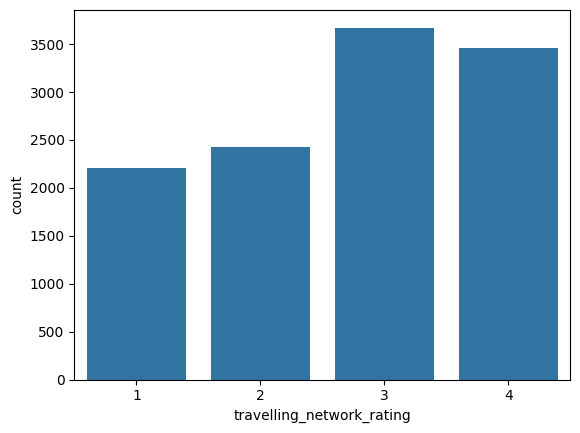

In [ ]:
sns.countplot(new_df,x='travelling_network_rating')
plt.show()

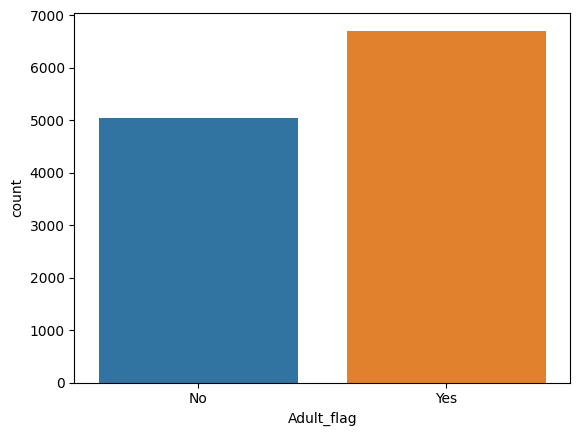

In [ ]:
sns.countplot(new_df,x='Adult_flag',hue='Adult_flag')
plt.show()

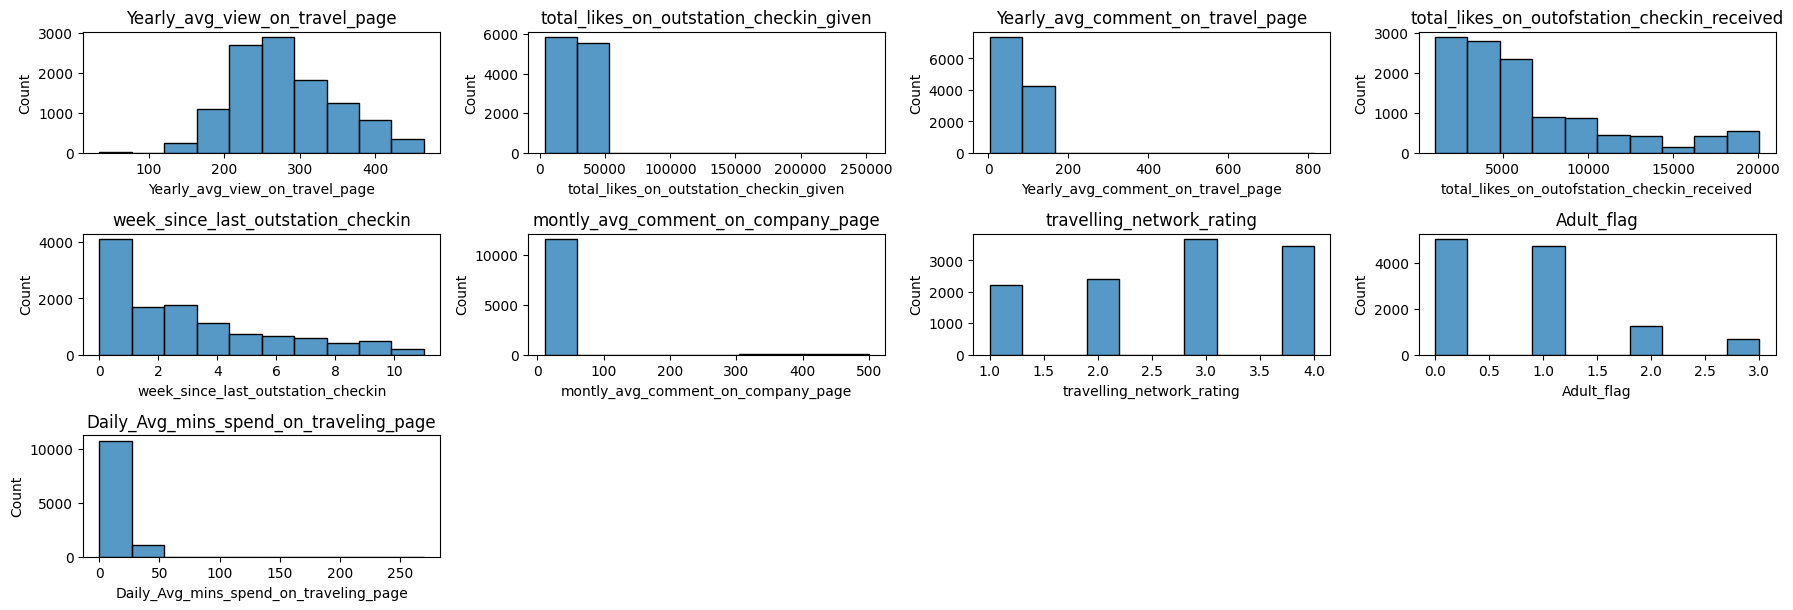

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.histplot(data= df, x= variable,bins= 10)  ## Complete the code to get boxplots for all numerical columns
    plt.tight_layout()
    plt.title(variable)

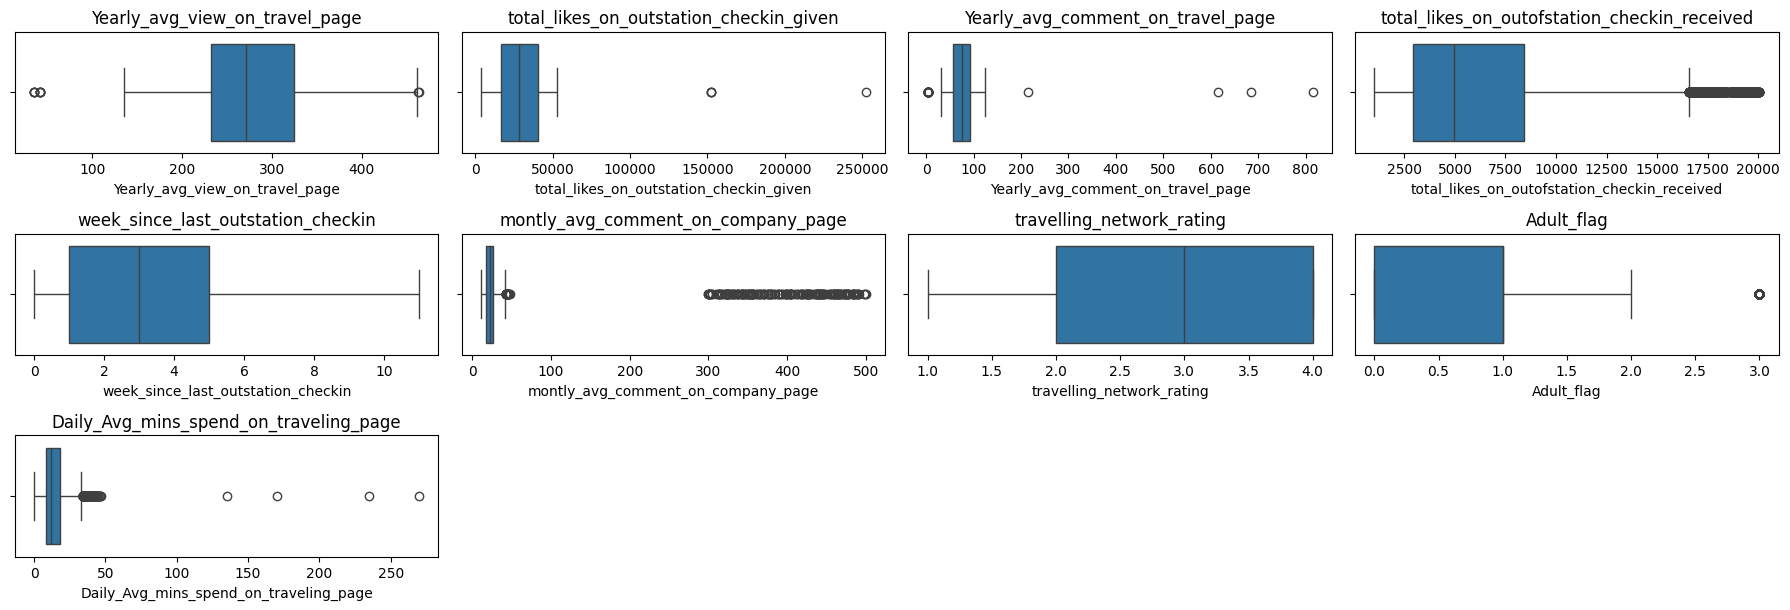

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(df,x= variable)  ## Complete the code to get boxplot of all variables with Default column in the data
    plt.tight_layout()
    plt.title(variable)

## Bivariate Analysis

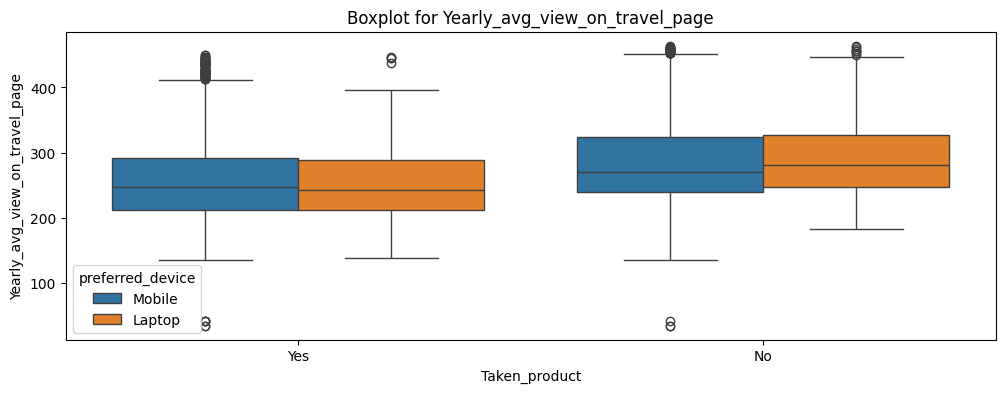

In [ ]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(data = new_df, y ='Yearly_avg_view_on_travel_page', x ='Taken_product', hue='preferred_device')
plt.title('Boxplot for Yearly_avg_view_on_travel_page')
plt.show()

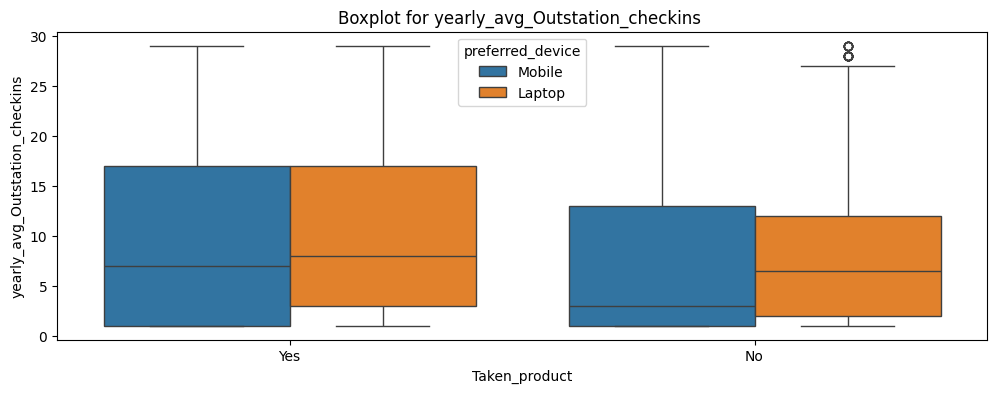

In [ ]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(data = new_df, y ='yearly_avg_Outstation_checkins', x ='Taken_product', hue='preferred_device')
plt.title('Boxplot for yearly_avg_Outstation_checkins ')
plt.show()

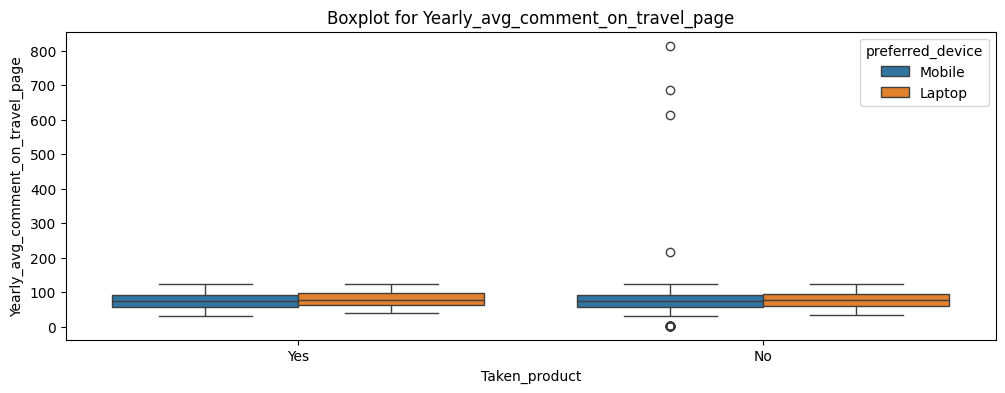

In [ ]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(data = new_df, y ='Yearly_avg_comment_on_travel_page', x ='Taken_product', hue='preferred_device')
plt.title('Boxplot for Yearly_avg_comment_on_travel_page')
plt.show()

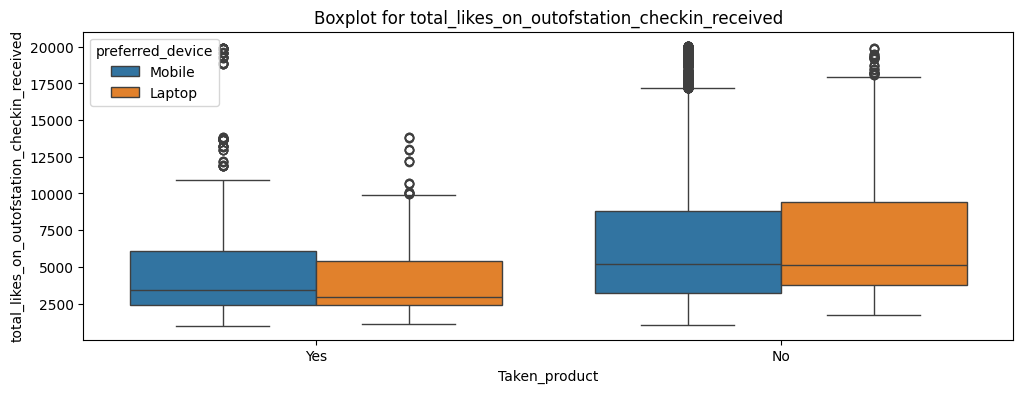

In [ ]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(data = new_df, y ='total_likes_on_outofstation_checkin_received', x ='Taken_product', hue='preferred_device')
plt.title('Boxplot for total_likes_on_outofstation_checkin_received')
plt.show()

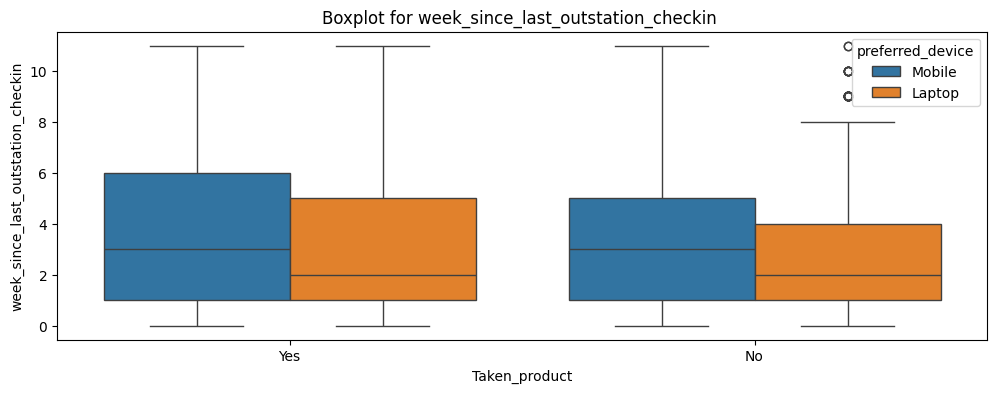

In [ ]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(data = new_df, y ='week_since_last_outstation_checkin', x ='Taken_product', hue='preferred_device')
plt.title('Boxplot for week_since_last_outstation_checkin ')
plt.show();

## Multivariate Analysis


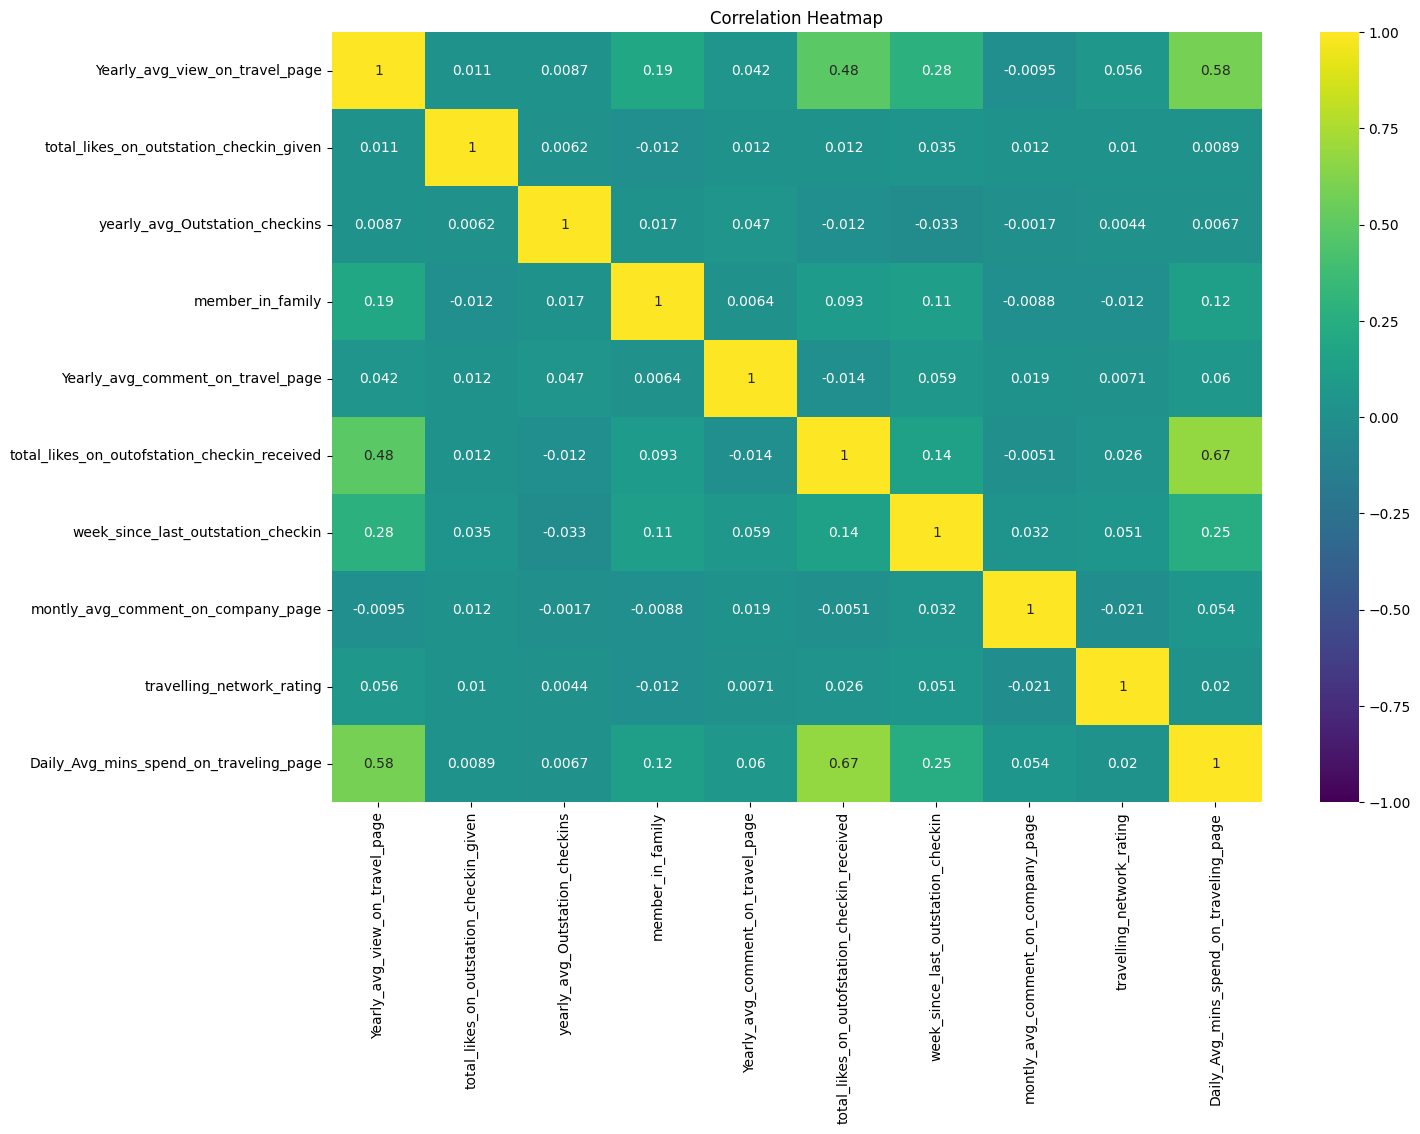

In [ ]:
numeric_cols = new_df.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

## converting the categorical variables to numerical variables

In [ ]:
converted_df= new_df.copy()

converted_df['Taken_product']= converted_df['Taken_product'].replace({'Yes':1,'No':0})

converted_df['preferred_device']= converted_df['preferred_device'].replace({'Mobile':1,'Laptop':0})

converted_df['Adult_flag']= converted_df['Adult_flag'].replace({'Yes':1,'No':0})

converted_df['working_flag']= converted_df['working_flag'].replace({'Yes':1,'No':0})

converted_df['following_company_page']= converted_df['following_company_page'].replace({'Yes':1,'No':0})



In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

converted_df['preferred_location_type']= lb.fit_transform(converted_df['preferred_location_type'])

In [ ]:
converted_df.head()


,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,1,38570.0,1.0,2,3,94.0,5993,8,1,11,0,1,0,8
1,0,367.0,1,9765.0,1.0,1,3,61.0,5130,1,0,23,1,4,1,10
2,1,277.0,1,48055.0,1.0,2,10,92.0,2090,6,1,15,0,2,0,7
3,0,247.0,1,48720.0,1.0,4,3,56.0,2909,1,1,11,0,3,0,8
4,0,202.0,1,20685.0,1.0,1,7,40.0,3468,9,0,12,0,4,1,6


In [ ]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()

scaled_df = pd.DataFrame(sc.fit_transform(converted_df.iloc[:,1:16]),columns = converted_df.iloc[:,1:16].columns)
scaled_df = scaled_df.round(2)

In [ ]:
scaled_df.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,0.40,0.32,0.74,-0.83,-0.88,-0.44,0.81,-0.11,1.83,1.60,-0.36,-0.43,-1.58,-1.15,-0.64
1,1.30,0.32,-1.30,-0.83,-1.84,-0.44,-0.58,-0.30,-0.84,-0.62,-0.12,2.35,1.19,0.87,-0.42
2,-0.05,0.32,1.41,-0.83,-0.88,1.34,0.72,-0.94,1.07,1.60,-0.28,-0.43,-0.66,-1.15,-0.75
3,-0.50,0.32,1.45,-0.83,1.03,-0.44,-0.79,-0.77,-0.84,1.60,-0.36,-0.43,0.27,-1.15,-0.64
4,-1.18,0.32,-0.53,-0.83,-1.84,0.57,-1.46,-0.65,2.22,-0.62,-0.34,-0.43,1.19,0.87,-0.86


In [ ]:
print(new_df['Taken_product'].value_counts())
print(new_df['Taken_product'].value_counts(normalize=True))

Taken_product
No     9864
Yes    1896
Name: count, dtype: int64
Taken_product
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


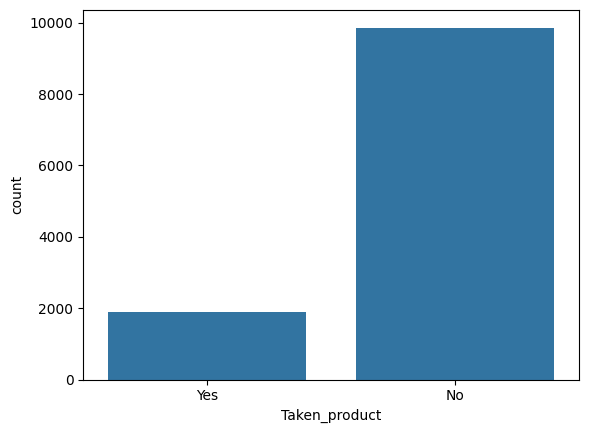

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Taken_product', data=new_df)
plt.show()

In [ ]:
IR = (new_df['Taken_product'].value_counts()[0])/(new_df['Taken_product'].value_counts()[1])
print(IR)

5.2025316455696204


# END